# <font color=#0066ff> Batch Payment Automation </font>


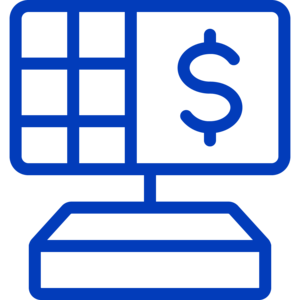

## <font color='yellow'>Code for token generation and API management</font>
      

In [ ]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO" #@param ['DEMO'] {allow-input: true}

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm Colab_shared_code_for_API_usage -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib

enableFormatterDF = True #@param {type:"boolean"}
from google.colab import data_table

if enableFormatterDF is True:
  data_table.enable_dataframe_formatter()
else:
  data_table.disable_dataframe_formatter()

try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests

main


In [ ]:
#@title Import custom modules
import time
from datetime import datetime,date


## <font color='yellow'>Connect and  retrieve token</font>

In [ ]:
#@title <font color='lime'>Connect</font>
print('token:')
token = sample_requests.login()

token:
9b803236-3952-4fc3-9baa-cc5ad4c49141


## <font color='yellow'>Capture payments</font>

In [ ]:
#@title <font color='lime'>Upload and import payments</font>
reference = "KDO" #@param {allow-input: true} {type:"string"}
referenceNumber = 8 #@param {type:"number"}
paymentDate = "2022-02-24" #@param {type:"date"}
amount = 4500.00 #@param {type:"number"}
paymentBAN = 734567898733
disbursementAccount = 456787671234
paymentDescription = "Test123 Payout" #@param {allow-input: true} {type:"string"}
payeeName = "Test123" #@param {allow-input: true} {type:"string"}
paymentMethod = "Domestic" #@param {allow-input: true} {type:"string"}
paymentType = "SEPA" #@param {allow-input: true} {type:"string"}
currencyCode = "GBP" #@param ["GBP", "EUR", "USD"] {type:"string"}
paymentMultiplier = 1  #@param {type:"slider", min:1, max:100, step:1}
paymentFileName = "payment"
#@markdown ---
manageSuccesses = True
usePayload = True #@param {type:"boolean"}
traces = False #@param {type:"boolean"}

if manageSuccesses is True:
  stop = False
else:
  stop = True

data = ""

transformedDate = paymentDate[8:10] + "/" + paymentDate[5:7] + "/" + paymentDate[0:4] 

if manageSuccesses:
  for i in range(1, paymentMultiplier + 1):
    data_in = reference + str(referenceNumber) + "," + str(transformedDate) + "," + str(amount) + "," + str(paymentBAN) + "," + str(disbursementAccount) + "," + paymentDescription + "," + payeeName + "," + paymentMethod + "," + paymentType + "," + currencyCode + "," + "\r\n"
    referenceNumber += 1
    data = data + data_in
  
today = date.today()
now = datetime.now()
dt_string = str(today) + 'T' + now.strftime("%H:%M")
filename = dt_string + "-" + str(paymentMultiplier) + "-" + paymentFileName + ".txt"

if traces:
  print('data:\r\n' + data)
  if usePayload:
    print('\r\ndata will be sent by payload\n')
  else:
    print('\r\ndata will be sent by file:' + filename + '\n')

if not stop:
  # print('\r\nstored data on KApp:' + filename)
  res = sample_requests.import_data(token, data, filename,'DEMO_PY_IMP', usePayload, traces)
  print(sample_requests.import_data)
else:
  print("At least a payment should be added!")


..
Complete
<function import_data at 0x7f1ab1d78b90>


In [ ]:
#@title <font color='lime'>Launch report on rejections</font>
res = sample_requests.run_report(token,'DEMO_PY_REJ')
buffer = sample_requests.StringIO(res[3:])
#df2 = pd.read_csv (buffer)
#i = iter(range(1, len(df2.columns) + 1))
#df2.columns = [x if not x.startswith('Unnamed') else next(i) for x in df2.columns]
df9 = sample_requests.pd.read_csv(buffer,skiprows=[0,1],header=None)
display(df9)

In [ ]:
#@title <font color='lime'>Export integrated payments by status</font>
placeholdercolumnsPT = ["reference", "transactionType", "debitingAccount", "transactionAmount", "transactionCurrency", "transactionStatus", "remittanceID", "lastACK", "...", "remittanceBankStatus", "lastACKDate", "lastACKTime", "rejectionInformation", "..."]
transactionStatus = "ALL" #@param ['Remitted', 'Registered','Executed', 'ALL']

res1 = sample_requests.run_report(token, 'DEMO_PY_ALL')
buffer = sample_requests.StringIO(res1)
# list of columns to display results from ProcessTemplates
columnsPT = placeholdercolumnsPT

# read and map result
df7 = sample_requests.pd.read_csv (buffer, delimiter = ";", header=None)
sample_requests.pd.set_option('display.max_colwidth', None)
df7.columns = df7.loc[0]
df7 = df7.loc[1:,:]
df7.columns = placeholdercolumnsPT
#df7 = df7[columnsPT]
#df7 = sample_requests.pd.read_csv(buffer,skiprows=[0,1],header=None)
#display(df7)

if transactionStatus == 'ALL':
  df2 = df7
else:
  df8 = df7[df7['transactionStatus'].str.contains(transactionStatus)]
  df2 = df8

print("List of available transactionStatus:")
print()
print(df7['transactionStatus'].unique())

display(df2)


## <font color='yellow'>[OPTIONAL] Remit payments</font>

In [ ]:
#@title <font color='lime'>[OPTIONAL] Remit last integrated payments</font>
traces = True #@param {type:"boolean"}
res = sample_requests.run_report(token,'DEMO_PY_REMIT', traces)

## <font color='yellow'>Kyriba APIs: build your future</font>

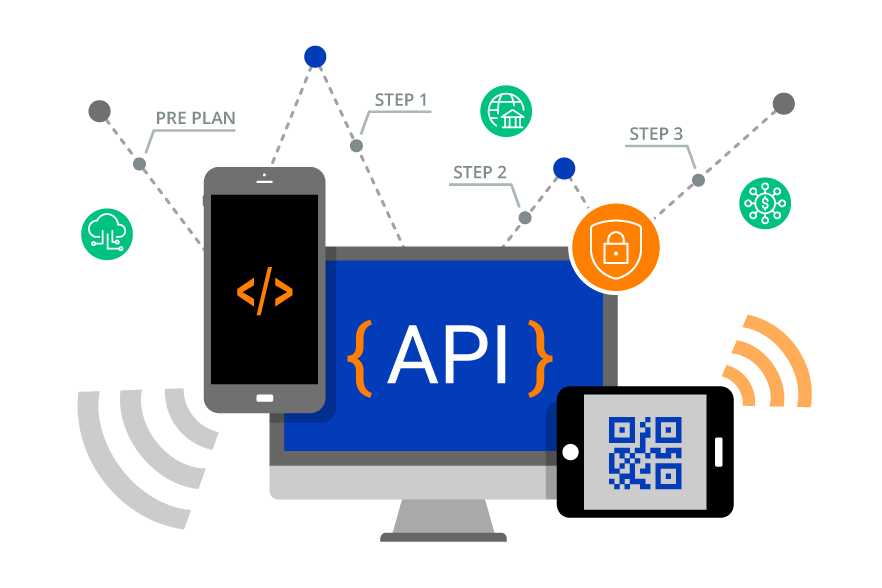